## Reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.graph_objects as go
import numpy as np
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_absolute_percentage_error
import os


plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


In [3]:
df= pd.read_csv("cleaned_hotel_booking.csv")

In [4]:
df.head()

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0      0            0        342                        0   
1      0            0          7                        0   
2      0            0         13                        0   
3      0            0         14                        0   
4      0            0         14                        0   

   stays_in_week_nights  adults  children  babies  meal country  \
0                     0       2         0       0     1     PRT   
1                     1       1         0       0     1     GBR   
2                     1       1         0       0     1     GBR   
3                     2       2         0       0     1     GBR   
4                     2       2         0       0     1     GBR   

   market_segment  distribution_channel  is_repeated_guest  \
0               0                     0                  0   
1               0                     0                  0   
2               1                     1                  0   
3               2                     2                  0   
4               2                     2                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   0   
1                       0                               0                   1   
2                       0                               0                   1   
3                       0                               0                   1   
4                       0                               0                   1   

   assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
0                   0                3             0                     0   
1                   0                0             0                     0   
2                   1                0             0                     0   
3                   1                0             0                     0   
4                   1                0             0                     0   

   customer_type   adr  required_car_parking_spaces  \
0              0   0.0                            0   
1              0  75.0                            0   
2              0  75.0                            0   
3              0  98.0                            0   
4              0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   0              2015-07-01   
1                          0                   0              2015-07-02   
2                          0                   0              2015-07-02   
3                          1                   0              2015-07-03   
4                          1                   0              2015-07-03   

  arrival_date  Total Guests  
0   2015-07-01             2  
1   2015-07-01             1  
2   2015-07-01             1  
3   2015-07-01             2  
4   2015-07-01             2

## Data Description

hotel: This attribute represents the type of hotel where the booking was made. It has two categories: "City Hotel" and "Resort Hotel," indicating whether the booking was for a city hotel or a resort hotel.

is_canceled: This binary attribute indicates whether the booking was canceled (1 for canceled, 0 for not canceled). It is a crucial feature for understanding booking cancellation patterns.

lead_time: The number of days between the booking date and the arrival date. This feature provides insight into how far in advance guests typically make their reservations.

stays_in_weekend_nights and stays_in_week_nights: These two attributes represent the number of weekend nights (Friday and Saturday) and weeknights (Sunday through Thursday) the guest plans to stay in the hotel, respectively. They help in analyzing the length of the stay.

adults, children, and babies: These attributes indicate the number of adults, children, and babies included in the booking. They are essential for understanding the composition of guests.

meal: This attribute represents the type of meal package booked by the guest, such as "BB" (Bed & Breakfast), "HB" (Half Board), "SC" (Self Catering), "Undefined," or "FB" (Full Board).

country: The country of origin of the guest. It provides information about the geographical distribution of guests.

market_segment: This attribute represents the market segment associated with the booking, such as "Online TA" (Travel Agents), "Offline TA/TO" (Travel Agents/Tour Operators), "Groups," "Direct," "Corporate," "Complementary," or "Aviation."

distribution_channel: This attribute indicates the distribution channel used to make the booking, including "TA/TO" (Travel Agents/Tour Operators), "Direct," "Corporate," "GDS" (Global Distribution System), or "Undefined."

is_repeated_guest: A binary attribute indicating whether the guest is a repeated guest (1 for repeated guest, 0 for not).

previous_cancellations and previous_bookings_not_canceled: These attributes represent the number of previous cancellations and previous bookings that were not canceled by the guest, respectively.

reserved_room_type and assigned_room_type: These attributes specify the type of room reserved by the guest and the type of room assigned to the guest, respectively.

booking_changes: The number of changes or modifications made to the booking. It reflects how often guests modify their reservations.

deposit_type: This attribute indicates the type of deposit made for the booking and can be "No Deposit," "Non Refund," or "Refundable."

days_in_waiting_list: The number of days the booking was on the waiting list before it was confirmed.

customer_type: This attribute represents the type of customer, such as "Transient," "Transient-Party," "Contract," or "Group."

adr: Average Daily Rate, which is the average price per night of the booking.

required_car_parking_spaces: Indicates the number of car parking spaces required by the guest.

total_of_special_requests: The total number of special requests made by the guest.

reservation_status: The reservation status, which can be "Check-Out," "Canceled," or "No-Show."

reservation_status_date: The date when the reservation status was last updated.

arrival_date: The date of guest arrival.

## Feature Engineering


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107520 entries, 0 to 107519
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           107520 non-null  int64  
 1   is_canceled                     107520 non-null  int64  
 2   lead_time                       107520 non-null  int64  
 3   stays_in_weekend_nights         107520 non-null  int64  
 4   stays_in_week_nights            107520 non-null  int64  
 5   adults                          107520 non-null  int64  
 6   children                        107520 non-null  int64  
 7   babies                          107520 non-null  int64  
 8   meal                            107520 non-null  int64  
 9   country                         107520 non-null  object 
 10  market_segment                  107520 non-null  int64  
 11  distribution_channel            107520 non-null  int64  
 12  is_repeated_gues

In [6]:
# convert arrival_time and reservation_status_date to datetime

df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
# Total Number of Days Stayed
df['Total Stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['Total Stays'].value_counts()


3    25504
2    25391
1    20014
4    16621
7     8133
5     7336
6     3516
0      637
8      281
9       87
Name: Total Stays, dtype: int64

In [8]:
dfNoCancel = df[df['is_canceled'] == 0]
dfNoCancel = dfNoCancel.reset_index(drop=True)

In [9]:
dfNoCancel["is_canceled"].value_counts()


0    68400
Name: is_canceled, dtype: int64

In [10]:
cancel_ratio= dfNoCancel["is_canceled"].value_counts()/df.shape[0]
cancel_ratio

0    0.636161
Name: is_canceled, dtype: float64

In [11]:
# Creating two dataframes include only discrete hotel type
dfResort = df[df['hotel'] == 0]
dfCity = df[df['hotel'] == 1]

df = df.reset_index(drop=True)

In [12]:
dfResort.head()

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0      0            0        342                        0   
1      0            0          7                        0   
2      0            0         13                        0   
3      0            0         14                        0   
4      0            0         14                        0   

   stays_in_week_nights  adults  children  babies  meal country  \
0                     0       2         0       0     1     PRT   
1                     1       1         0       0     1     GBR   
2                     1       1         0       0     1     GBR   
3                     2       2         0       0     1     GBR   
4                     2       2         0       0     1     GBR   

   market_segment  distribution_channel  is_repeated_guest  \
0               0                     0                  0   
1               0                     0                  0   
2               1                     1                  0   
3               2                     2                  0   
4               2                     2                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   0   
1                       0                               0                   1   
2                       0                               0                   1   
3                       0                               0                   1   
4                       0                               0                   1   

   assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
0                   0                3             0                     0   
1                   0                0             0                     0   
2                   1                0             0                     0   
3                   1                0             0                     0   
4                   1                0             0                     0   

   customer_type   adr  required_car_parking_spaces  \
0              0   0.0                            0   
1              0  75.0                            0   
2              0  75.0                            0   
3              0  98.0                            0   
4              0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   0              2015-07-01   
1                          0                   0              2015-07-02   
2                          0                   0              2015-07-02   
3                          1                   0              2015-07-03   
4                          1                   0              2015-07-03   

  arrival_date  Total Guests  Total Stays  
0   2015-07-01             2            0  
1   2015-07-01             1            1  
2   2015-07-01             1            1  
3   2015-07-01             2            2  
4   2015-07-01             2            2

In [13]:
# Calculating Number of Guests Weekly - Resort Hotel
NumberOfGuests_Resort = dfResort[['arrival_date', 'Total Guests']]
print(NumberOfGuests_Resort)

      arrival_date  Total Guests
0       2015-07-01             2
1       2015-07-01             1
2       2015-07-01             1
3       2015-07-01             2
4       2015-07-01             2
...            ...           ...
33226   2017-08-31             2
33227   2017-08-31             2
33228   2017-08-31             3
33229   2017-08-31             2
33230   2017-08-31             3

[33231 rows x 2 columns]


In [14]:

NumberOfGuests_ResortWeekly = dfResort['Total Guests'].groupby(dfResort['arrival_date']).sum()
print(NumberOfGuests_ResortWeekly)

arrival_date
2015-07-01    71
2015-07-02    79
2015-07-03    68
2015-07-04    78
2015-07-05    77
              ..
2017-08-27    78
2017-08-28    81
2017-08-29    52
2017-08-30    61
2017-08-31    85
Name: Total Guests, Length: 793, dtype: int64


In [15]:
NumberOfGuests_ResortWeekly = NumberOfGuests_ResortWeekly.resample('w').sum().to_frame()
NumberOfGuests_ResortWeekly.head()

Total Guests
arrival_date              
2015-07-05             373
2015-07-12             514
2015-07-19             609
2015-07-26             554
2015-08-02             603

# Data Visualization

## No of records by country

In [16]:
country_freq = df['country'].value_counts().to_frame()
country_freq.columns = ['count']
fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.show()

According to map, the most of the customers are coming from the Portuguese. As you can see from the figure, the customers are usually coming from the Europe region.

## Number of Records Monthly

In [17]:
dfResortMonthly = dfResort['arrival_date'].value_counts()
dfResortMonthly = dfResortMonthly.resample('m').sum().to_frame()

dfCityMonthly = dfCity['arrival_date'].value_counts()
dfCityMonthly = dfCityMonthly.resample('m').sum().to_frame()

fig = go.Figure()
fig.add_trace(go.Scatter(x=dfResortMonthly.index, y=dfResortMonthly['arrival_date'], name="Resort Hotel",
                         hovertext=dfResortMonthly['arrival_date']))
fig.add_trace(go.Scatter(x=dfCityMonthly.index, y=dfCityMonthly['arrival_date'], name="City Hotel",
                         hovertext=dfCityMonthly['arrival_date']))
fig.update_layout(title_text='Number of Records Monthly',
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Records")

fig.show()

According to the graph above, the City Hotel has always the highest Number of Records for all dates. You can see the seasonal difference of the Number of Records easily.

## Number of Records Weekly

In [18]:
dfResortWeekly = dfResort['customer_type'].groupby(dfResort['arrival_date']).count()
dfResortWeekly = dfResortWeekly.resample('w').sum().to_frame()

fig = px.line(dfResortWeekly, x=dfResortWeekly.index, y=dfResortWeekly['customer_type'])
fig.update_layout(title_text='Number of Records Weekly - Resort Hotel',
                  title_x=0.5, title_font=dict(size=30))
fig.show()

fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Records")

dfCityWeekly = dfCity['customer_type'].groupby(dfCity['arrival_date']).count()
dfCityWeekly = dfCityWeekly.resample('w').sum().to_frame()

fig = px.line(dfCityWeekly, x=dfCityWeekly.index, y=dfCityWeekly['customer_type'])
fig.update_layout(title_text='Number of Records Weekly - City Hotel',
                  title_x=0.5, title_font=dict(size=30))

fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Records")

fig.show()


## Number of guests weekly

In [19]:
# Calculating Number of Guests Weekly - City Hotel
NumberOfGuests_City = dfCity[['arrival_date', 'Total Guests']]
NumberOfGuests_CityWeekly = dfCity['Total Guests'].groupby(df['arrival_date']).sum()
NumberOfGuests_CityWeekly = NumberOfGuests_CityWeekly.resample('w').sum().to_frame()
NumberOfGuests_CityWeekly.head()

Total Guests
arrival_date              
2015-07-05             350
2015-07-12             425
2015-07-19             636
2015-07-26             872
2015-08-02             433

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=NumberOfGuests_ResortWeekly.index, y=NumberOfGuests_ResortWeekly['Total Guests'],
                         name="Resort Hotel",
                         hovertext=NumberOfGuests_ResortWeekly['Total Guests']))

fig.add_trace(go.Scatter(x=NumberOfGuests_CityWeekly.index, y=NumberOfGuests_CityWeekly['Total Guests'],
                         name="City Hotel",
                         hovertext=NumberOfGuests_CityWeekly['Total Guests']))

fig.update_layout(title_text='Number of Guests Weekly',
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Guests")

fig.show()

## Number of Guests by Customer Type

In [21]:
# 'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3
df['customer_type'].value_counts()

0    80607
2    23064
1     3315
3      534
Name: customer_type, dtype: int64

In [22]:
customerTransient = df[df['customer_type'] == 0]
customerContract = df[df['customer_type'] == 1]
customerTransientParty = df[df['customer_type'] == 2]
customerGroup = df[df['customer_type'] == 3]

customerTransient = customerTransient.set_index("arrival_date")
customerContract = customerContract.set_index("arrival_date")
customerTransientParty = customerTransientParty.set_index("arrival_date")
customerGroup = customerGroup.set_index("arrival_date")

customerTransientMonthly = customerTransient.resample('m').sum()
customerContract = customerContract.resample('m').sum()
customerTransientParty = customerTransientParty.resample('m').sum()
customerGroup = customerGroup.resample('m').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=customerTransientMonthly.index, y=customerTransientMonthly['Total Guests'],
                         name="Transient Guests",
                         ))
fig.add_trace(go.Scatter(x=customerContract.index, y=customerContract['Total Guests'],
                         name="Contract Guests",
                         ))
fig.add_trace(go.Scatter(x=customerTransientParty.index, y=customerTransientParty['Total Guests'],
                         name="Transient-Party Guests",
                         ))
fig.add_trace(go.Scatter(x=customerGroup.index, y=customerGroup['Total Guests'],
                         name="Group Guests",
                         ))
fig.update_layout(title_text='Number of Guests by Customer Type',
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Guests")

fig.show()

As seen from the graph, the Transient Number of Guests is increasing significantly. On the other hand, the Group and Contract Guests are generally stable.

Transient-Party Number of Guests are decreasing.

## Number of Guests by Market Segment

In [23]:
df['market_segment'].value_counts()

2    51653
3    21525
5    17420
0    11052
1     4942
4      718
7      210
Name: market_segment, dtype: int64

In [24]:
# 'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7

customerOnline = df[df['market_segment'] == 2]
customerDirect = df[df['market_segment'] == 0]
customerOffline = df[df['market_segment'] == 3]
customerCorporate = df[df['market_segment'] == 1]
customerComplementary = df[df['market_segment'] == 4]
customerGroups = df[df['market_segment'] == 5]
customerAviation = df[df['market_segment'] == 7]



customerOnline = customerOnline.set_index("arrival_date")
customerDirect = customerDirect.set_index("arrival_date")
customerOffline = customerOffline.set_index("arrival_date")
customerCorporate = customerCorporate.set_index("arrival_date")
customerComplementary = customerComplementary.set_index("arrival_date")
customerGroups = customerGroups.set_index("arrival_date")
customerAviation = customerAviation.set_index("arrival_date")


customerOnline = customerOnline.resample('m').sum()
customerDirect = customerDirect.resample('m').sum()
customerOffline = customerOffline.resample('m').sum()
customerCorporate = customerCorporate.resample('m').sum()
customerComplementary = customerComplementary.resample('m').sum()
customerGroups = customerGroups.resample('m').sum()
customerAviation = customerAviation.resample('m').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=customerOnline.index, y=customerOnline['Total Guests'],
                         name="Online TA Segment Guests",
                         ))
fig.add_trace(go.Scatter(x=customerDirect.index, y=customerDirect['Total Guests'],
                         name="Direct Segment Guests",
                         ))
fig.add_trace(go.Scatter(x=customerOffline.index, y=customerOffline['Total Guests'],
                         name="Offline TA/TO Segment Guests",
                         ))
fig.add_trace(go.Scatter(x=customerCorporate.index, y=customerCorporate['Total Guests'],
                         name="Corporate",
                         ))
fig.add_trace(go.Scatter(x=customerComplementary.index, y=customerComplementary['Total Guests'],
                         name="Complementary",
                         ))
fig.add_trace(go.Scatter(x=customerGroups.index, y=customerGroups['Total Guests'],
                         name="Groups",
                         ))
fig.add_trace(go.Scatter(x=customerAviation.index, y=customerAviation['Total Guests'],
                         name="Aviation",
                         ))

fig.update_layout(title_text='Number of Guests by Market Segment',
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Guests")

fig.show()

According to the graph, the Online Segment Number of Guests is increasing for each season. The hotel owners would like to think to improve their social media or website for having the attention of the potential customers.

## Distribution of Market Segment by different Hotel type

In [25]:
market_segment_labels = ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']

fig = px.histogram(df, x="market_segment", color='hotel')
fig.update_layout(barmode='group', xaxis={'categoryorder': 'total descending'   })
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Distribution of Market Segment by different Hotel Types',
                  title_x=0.5, title_font=dict(size=20))  # Location and the font size of the main title


fig.update_xaxes(
    tickvals=[0, 1, 2, 3, 4, 5, 6, 7],  # Assign values (0 and 1) based on your data mapping
    ticktext=market_segment_labels,  # Assign the corresponding labels
)

# Update the legend 
fig.update_layout(
    legend_title_text='Hotel Type',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
        ), )
# map the legend

fig['data'][0]['name'] = "Resort Hotel"
fig['data'][1]['name'] = "City Hotel"

fig.show()

## Distribution of Reservation Status

In [26]:
# 'Check-Out': 0, 'Canceled': 1, 'No-Show': 2

reservation_status = df['reservation_status'].value_counts()
fig = go.Figure(data=[go.Pie(labels=["Check-Out","Cancelled","No-show"], values=reservation_status, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Reservation Status', title_x=0.5, title_font=dict(size=32))

fig.show()

## Distribution of Room Type and ADR

In [27]:
# df['reserved_room_type'] = df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8})
# df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

reserved_room_type_labels = ['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B']

fig = px.box(data_frame=dfNoCancel, x='reserved_room_type', y='adr', color='hotel')
fig.update_layout(title_text='Distribution of Room Type and ADR',
                  title_x=0.5, title_font=dict(size=20))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.update_xaxes(
    tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8],  # Assign values (0 and 1) based on your data mapping
    ticktext=reserved_room_type_labels # Assign the corresponding labels
)

fig['data'][0]['name'] = "Resort Hotel"
fig['data'][1]['name'] = "City Hotel"


fig.show()

## Distribution of Room Meal and ADR

In [28]:
# df['meal'] = df['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3, 'Undefined': 4})

meal_labels = ['SC', 'BB', 'HB', 'FB', 'Undefined']

fig = px.box(data_frame=dfNoCancel, x='meal', y='adr', color='hotel')
fig.update_layout(title_text='Distribution of Meal Type and ADR',
                    title_x=0.5, title_font=dict(size=20))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.update_xaxes(
    tickvals=[0, 1, 2, 3, 4],  # Assign values (0 and 1) based on your data mapping
    ticktext=meal_labels # Assign the corresponding labels
)

fig['data'][0]['name'] = "Resort Hotel"
fig['data'][1]['name'] = "City Hotel"

fig.show()


## Did the guests get the reserved room

In [29]:
dfResort['TookReservedRoom'] = np.where(dfResort['reserved_room_type'] == dfResort['assigned_room_type'],
                                          'Yes', 'No')
dfCity['TookReservedRoom'] = np.where(dfCity['reserved_room_type'] == dfCity['assigned_room_type'],
                                        'Yes', 'No')

fig = go.Figure(data=[go.Pie(labels=dfResort['TookReservedRoom'].unique(),
                             values=dfResort['TookReservedRoom'].value_counts(), opacity=0.9)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Did the Guests get the Reserved Room? - Resort Hotel',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

fig = go.Figure(data=[go.Pie(labels=dfCity['TookReservedRoom'].unique(),
                             values=dfCity['TookReservedRoom'].value_counts(), opacity=0.9)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Did the Guests get the Reserved Room? - City Hotel',
                  title_x=0.5, title_font=dict(size=22))
fig.show()


## Density Plot of Number of Days Stayed for different Hotel Types

Text(0.5, 1.0, 'Density Plot of Number of Days Stayed for different Hotel Types')

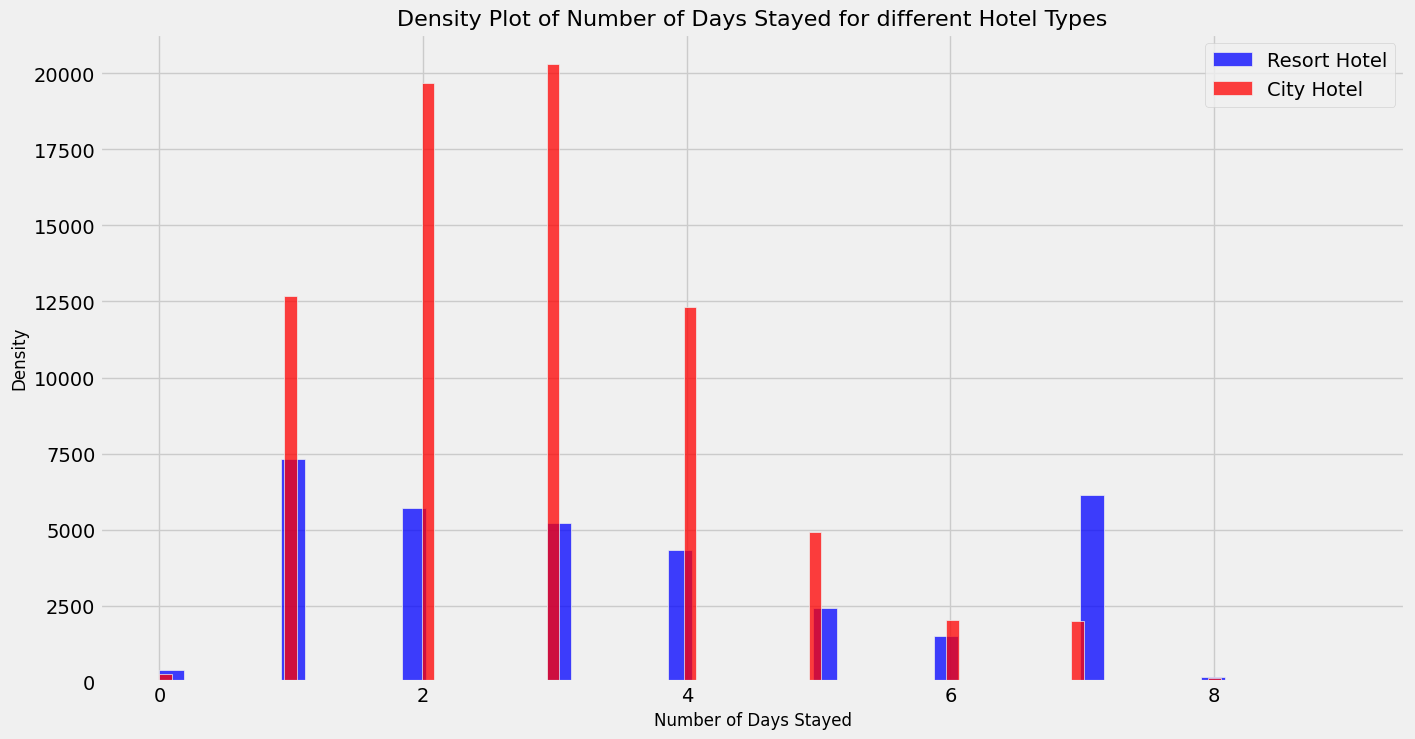

In [30]:
plt.figure(figsize=(15, 8))
sns.histplot(dfResort['Total Stays'], color='blue')
sns.histplot(dfCity['Total Stays'], color='red')
plt.xlabel("Number of Days Stayed", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Resort Hotel', 'City Hotel'], loc='upper right')
plt.title("Density Plot of Number of Days Stayed for different Hotel Types", fontsize=16)

## Correlation Graph City Hotel

Text(0.5, 1.0, 'Correlation Graph of the City Hotel')

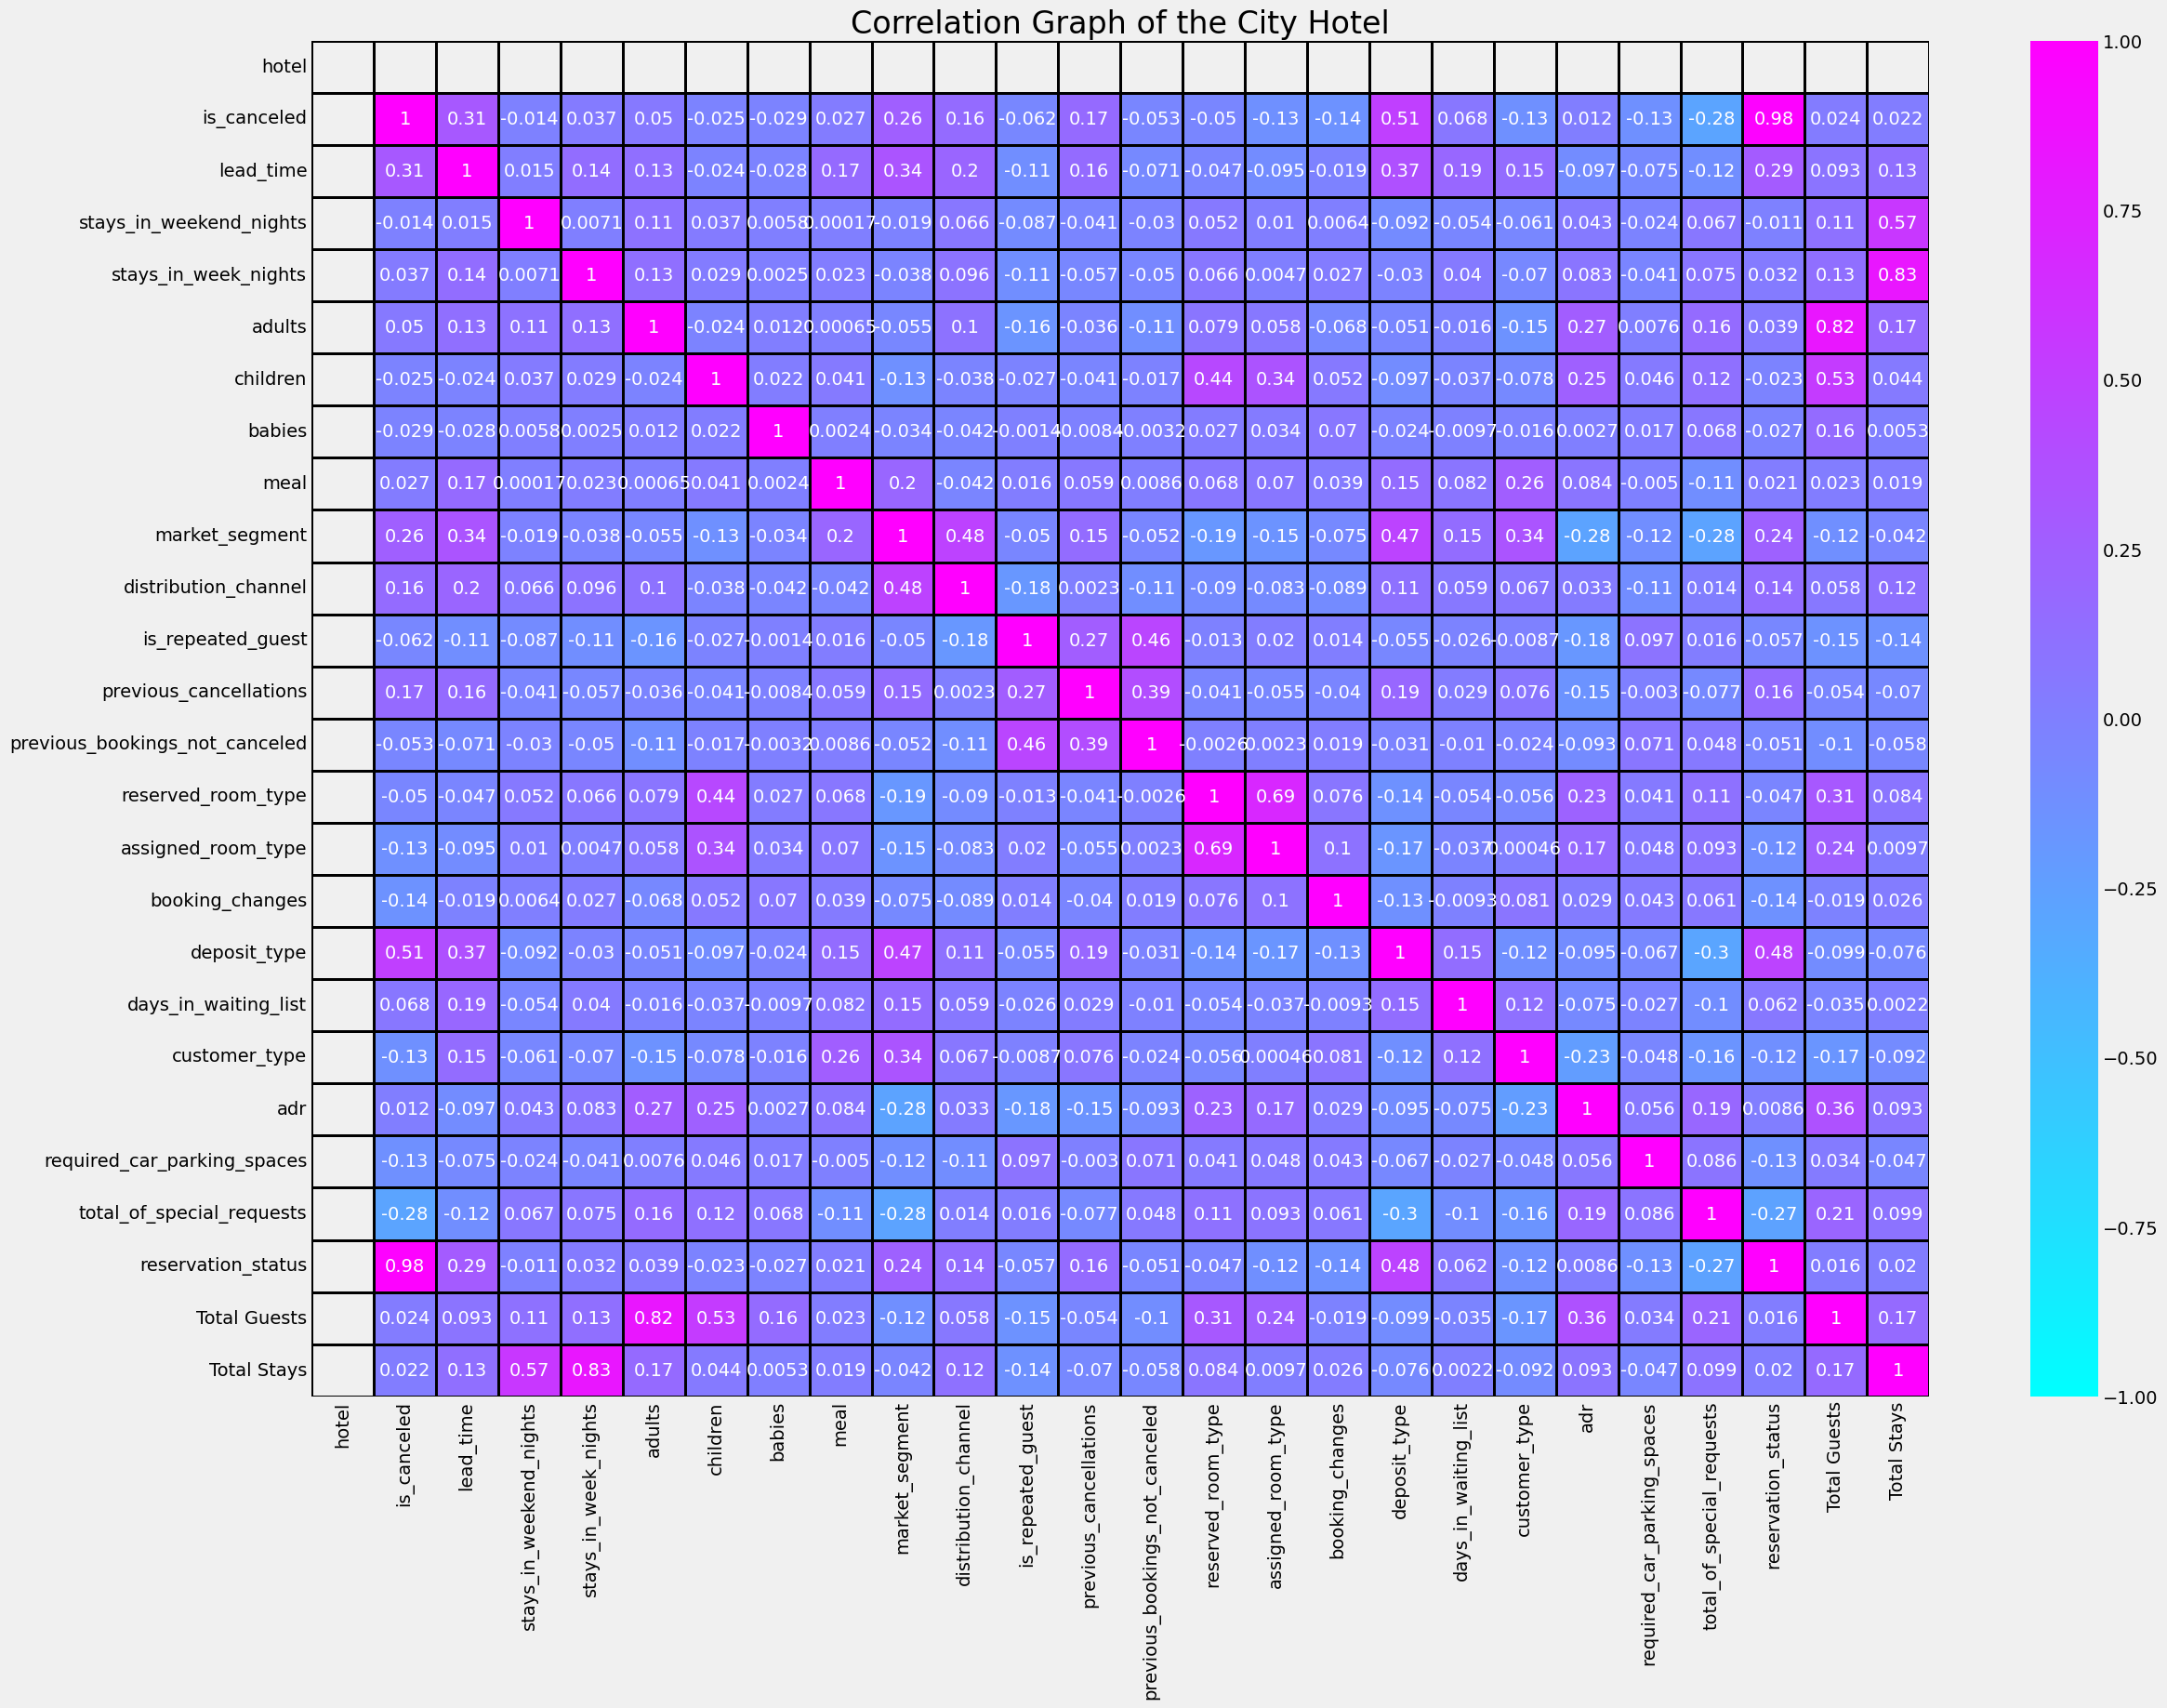

In [31]:
plt.figure(figsize=(25, 18))
correlation = sns.heatmap(dfCity.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black',cmap="cool")
correlation.set_title('Correlation Graph of the City Hotel', fontdict={'fontsize': 24})

## Correlation Graph Resort Hotel

Text(0.5, 1.0, 'Correlation Graph of the Resort Hotel')

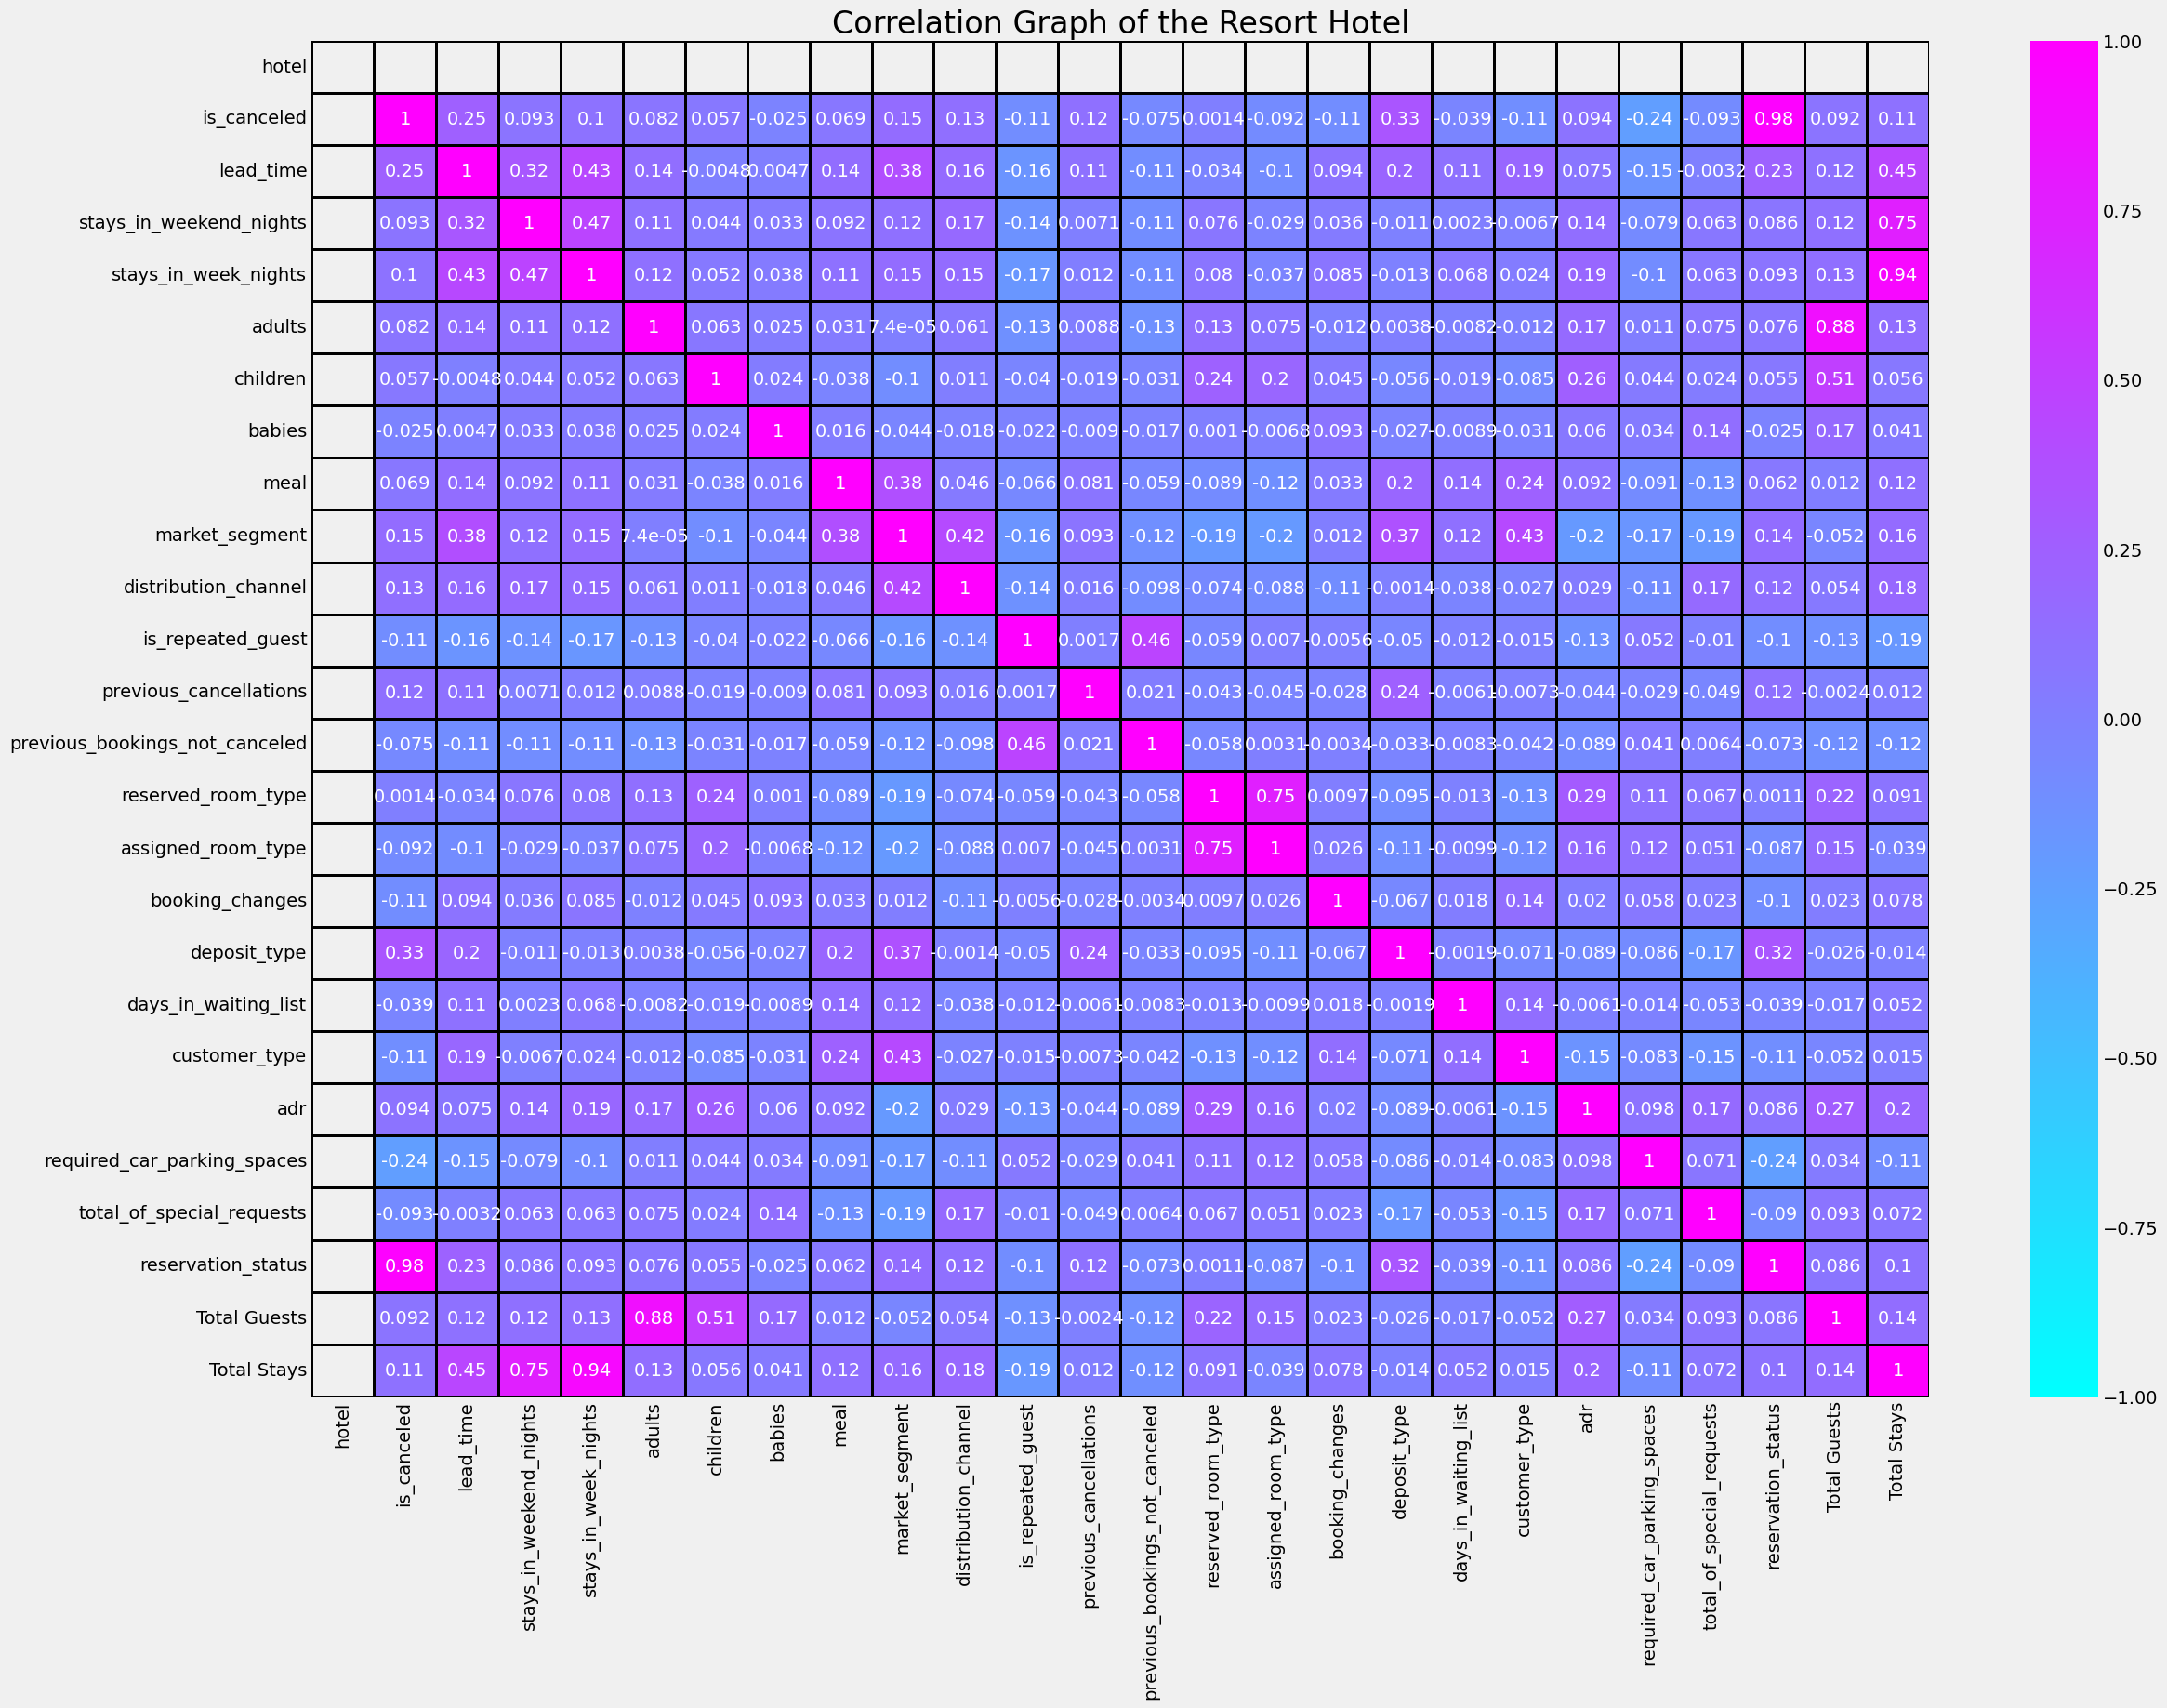

In [32]:
plt.figure(figsize=(25, 18))
correlation = sns.heatmap(dfResort.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black',cmap="cool")
correlation.set_title('Correlation Graph of the Resort Hotel', fontdict={'fontsize': 24})